In [42]:
# modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score, roc_curve, auc, classification_report

In [16]:
df = pd.read_csv("/content/sample_data/samples_cancer.csv")

In [17]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [18]:
# rm the ID column (not required ig)
df.drop(columns='ID',inplace=True)

In [19]:
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [20]:
# do it for validating any NaN value and rm it
# replcae '?' with NaN
df.replace("?",np.nan,inplace=True)
df.dropna(inplace=True)

In [21]:
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [23]:
x = df.iloc[:,0:-1]  # independant values
y = df.iloc[:,-1].values # dependant values

In [31]:
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

In [32]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  # 20% of data for test case

In [40]:
X_train.head(),y_train

(     Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  BlandChrom  \
 326     10         1          1        1            2      10           5   
 208      1         1          1        1            1       1           3   
 271      5         1          1        1            2       1           3   
 409      3         1          2        1            2       1           2   
 103      8         2          3        1            6       3           7   
 
      NormNucl  Mit  
 326         4    1  
 208         1    1  
 271         1    1  
 409         1    1  
 103         1    1  ,
 array([4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2,
        4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4,
        4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
        2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4,
        4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2,
        4, 2, 2, 4, 2, 2, 2

In [43]:
# data preprocessing
scaler = StandardScaler().fit(X_train)

In [46]:
X_train_scaled = scaler.transform(X_train)

In [47]:
scalerT = StandardScaler().fit(X_test)
X_test_scaled = scalerT.transform(X_test)

In [50]:
X_test_scaled

array([[-1.20834278, -0.72017241, -0.74303148, ..., -1.01206688,
        -0.57972754, -0.39273091],
       [-0.51569441, -0.72017241, -0.74303148, ..., -0.58280012,
        -0.57972754, -0.39273091],
       [ 0.17695396,  0.60417149,  0.57045643, ...,  0.27573339,
         0.12940347, -0.39273091],
       ...,
       [-0.16937022, -0.72017241, -0.74303148, ..., -1.01206688,
        -0.57972754, -0.39273091],
       [-0.16937022,  2.25960136,  0.24208445, ...,  2.42206718,
         2.611362  , -0.39273091],
       [-0.86201859, -0.72017241, -0.74303148, ..., -0.58280012,
        -0.57972754, -0.39273091]])

In [52]:
# perform logistic regression
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [55]:
print(f'coefficient: {model.coef_} \n constraint: {model.intercept_}')

coefficient: [[1.14459397 0.20715815 0.57483345 0.64617077 0.51216235 1.3054481
  0.98577502 0.7900617  0.4331472 ]] 
 constraint: [-1.15113043]


In [56]:
# prediction with the test dataset
y_pred = model.predict(X_test_scaled)

In [57]:
# summary
df = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
df

,actual,predicted
0,2,2
1,2,2
2,4,4
3,4,4
4,2,2
...,...,...
132,4,4
133,2,2
134,2,2
135,4,4


In [58]:
# confusion matrix
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[84,  3],
       [ 3, 47]])

<Axes: >

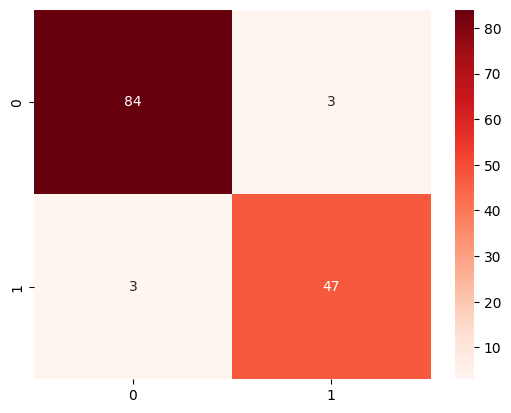

In [ ]:
sns.heatmap(matrix, annot=True)

In [67]:
# performance matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label=2)
recall = recall_score(y_test, y_pred,pos_label=2)
f1 = f1_score(y_test, y_pred,pos_label=2)

In [72]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

Accuracy: 0.9562
Precision: 0.9655
Recall: 0.9655
F1 Score: 0.9655


In [75]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred,pos_label=2)
roc_auc = auc(fpr, tpr)

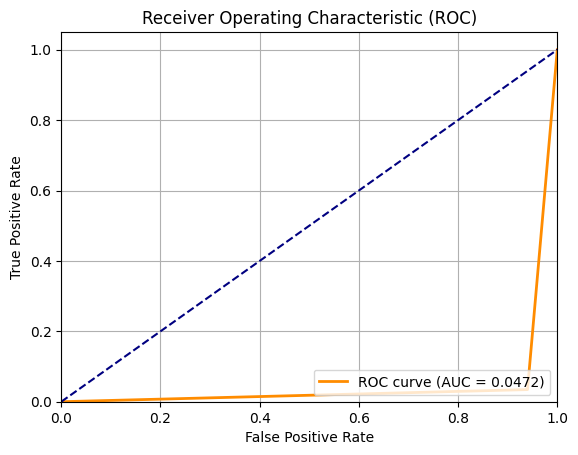

In [ ]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()